### 1- Min-Max Scaling

<img src=https://media.geeksforgeeks.org/wp-content/uploads/min-max-normalisation.jpg alt="Drawing" style="width: 200px;"/>

### 2- Standardization (Variance Scaling)


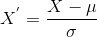

### 3- L2 Normalization


This technique normalizes (divides) the original feature value by what’s known as the
l2 norm, also known as the Euclidean norm.

<img src=https://i.stack.imgur.com/wWpG2.png alt="Drawing" style="width: 300px;"/>

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, normalize

In [8]:
# Load the Online News Popularity dataset

df = pd.read_csv('/home/garvit/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
25609,http://mashable.com/2014/05/21/oculus-vr-sued-...,232.0,12.0,365.0,0.467033,1.0,0.587963,9.0,1.0,1.0,...,0.100000,0.7,-0.271759,-0.60,-0.125000,0.000000,0.000000,0.500000,0.000000,1700
12216,http://mashable.com/2013/08/28/nexus-7-europe/,498.0,11.0,335.0,0.588050,1.0,0.653333,18.0,3.0,1.0,...,0.136364,0.6,0.000000,0.00,0.000000,0.000000,0.000000,0.500000,0.000000,1200
23279,http://mashable.com/2014/04/09/umass-derrick-g...,273.0,8.0,380.0,0.520548,1.0,0.627049,12.0,0.0,1.0,...,0.033333,1.0,-0.250000,-0.25,-0.250000,0.250000,0.250000,0.250000,0.250000,1000
751,http://mashable.com/2013/01/21/bette-midler-tw...,717.0,8.0,400.0,0.509695,1.0,0.537037,19.0,2.0,10.0,...,0.200000,0.6,-0.289352,-0.40,-0.155556,0.500000,0.136364,0.000000,0.136364,423
37414,http://mashable.com/2014/11/20/worlds-tallest-...,47.0,11.0,789.0,0.510940,1.0,0.696281,30.0,12.0,11.0,...,0.033333,1.0,-0.310648,-0.80,-0.033333,0.454545,0.136364,0.045455,0.136364,1500


#### original data

In [35]:
# Look at the original data - the number of words in an article
df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

#### Min-Max Scaling

In [36]:
# Min-Max Scaling

minmaxscaler = MinMaxScaler()
df['minmax'] = minmaxscaler.fit_transform(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

#### Standardization (variance scaling)

In [50]:
# Standardization

standardscaler = StandardScaler()
df['standardized'] = standardscaler.fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

#### L2 - normalization

In [65]:
# L2 Normalization

df['l2_norm'] = normalize(df[['n_tokens_content']], axis=0)
df['l2_norm'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

 Plotting the histograms of original and scaled data


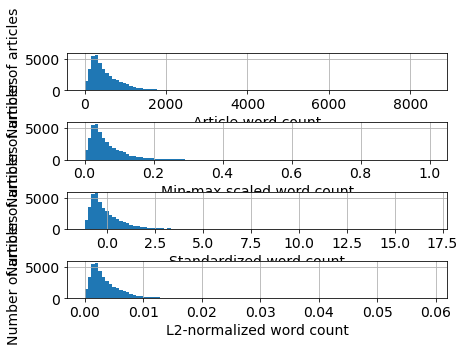

In [72]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
plt.tight_layout()

df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_norm'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

plt.show()